In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [46]:
base_path = '../experiments/'
model = 'resnet18'

METHODS = {
    "ig": "ig",
    "saliency": "saliency",
    "gradcam": "gradcam",
    "deconv": "deconv",
    "gbp": "gbp",
}

DATASETS = {
    "edible-plants": "edible-plants",
    "food101": "food101",
    "marvel": "marvel",
    "plant-data": "plant-data",
    "stanford-dogs": "stanford-dogs",
}
ACC = {
    "edible-plants": "0.75",
    "food101": "0.72",
    "marvel": "0.67",
    "plant-data": "0.86",
    "stanford-dogs": "0.74",
}

In [47]:
scores = []
for dataset in DATASETS.keys():
    for method in METHODS.keys():
        path = os.path.join(base_path, dataset, model, method, f"{model}-{dataset}-{method}.csv")
        df = pd.read_csv(path)
        df = df.mean(axis=0)
        scores.append([model, dataset, method, ACC[dataset], df['# infidelity'], df['sensitivity']])
       

In [48]:
scores_df = pd.DataFrame(np.array(scores), columns=['model', 'dataset', 'method', 'acc', 'infidelity', 'sensitivity'])

In [49]:
scores_df[scores_df['method'] == 'ig']

,model,dataset,method,acc,infidelity,sensitivity
0,resnet18,edible-plants,ig,0.75,0.00027746280206362983,1.305071031260001
5,resnet18,food101,ig,0.72,0.0005888116025112056,1.3099454139491782
10,resnet18,marvel,ig,0.67,0.00014989026963519762,1.2727301566371432
15,resnet18,plant-data,ig,0.86,0.0003225476155371041,1.308256626908641
20,resnet18,stanford-dogs,ig,0.74,0.0007395248325781977,1.3364515650458293


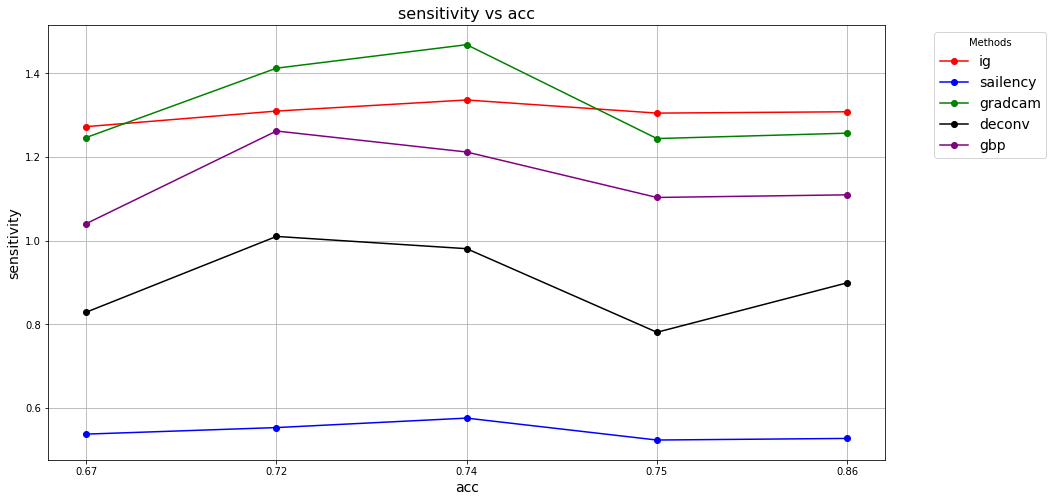

In [63]:
COLORS = {
    "ig": "red",
    "saliency": "blue",
    "gradcam": "green",
    "deconv": "black",
    "gbp": "purple",
}
plt.figure(figsize=(15,8)) 

for method in METHODS.keys():
    filter_df = scores_df[scores_df['method'] == method].sort_values(['acc'])
    filter_df['sensitivity'] = filter_df['sensitivity'].map(lambda x: float(x))
    
    plt.plot(filter_df['acc'], filter_df['sensitivity'], color=COLORS[method], marker='o', label=method)
    
plt.title('sensitivity vs acc', fontsize=16)
plt.xlabel('acc', fontsize=14)
plt.ylabel('sensitivity', fontsize=14)
plt.legend( title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True)
plt.show()

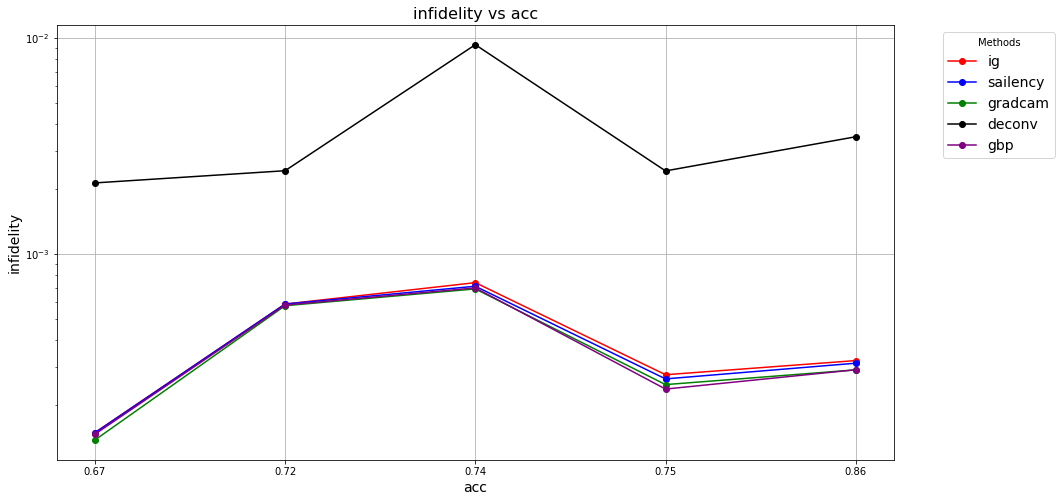

In [64]:

plt.figure(figsize=(15,8)) 
for method in METHODS.keys():
    filter_df = scores_df[scores_df['method'] == method].sort_values(['acc'])
    filter_df['infidelity'] = filter_df['infidelity'].map(lambda x: float(x))
    
    plt.plot(filter_df['acc'], filter_df['infidelity'], color=COLORS[method], marker='o', label=method)
    
plt.title('infidelity vs acc', fontsize=16)
plt.xlabel('acc', fontsize=14)
plt.ylabel('infidelity', fontsize=14)
plt.yscale('log')
plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True)
plt.show()